# Anaysis of the helpdesk log of an Italian Company

This analysis aims to analyse the judicial performance of Brazilian courts. The dataset was gotten from [here](https://data.4tu.nl/articles/dataset/Dataset_belonging_to_the_help_desk_log_of_an_Italian_Company/12675977).

The event log concerns the ticketing management process of the Help desk of an Italian software company. It contains 21348 events, 4580 cases and 14 activities

It contains the following list of attributes with their meaning:
* Case ID: the case identifier
* Activity: the activity name
* Resource: the resource who performed the action
* Complete Timestamp: the timestamp of the event. Format: YYYY/MM/DD hh:mm:ss.sss
* Variant: case variant
* Variant index: case variant in integer format
* seriousness: a seriousness level for the ticket
* customer: name of the customer
* product: name of the product
* responsible_section: name of the responsible section
* seriousness_2: a sub-seriousness level
* service_level: level of the service
* service_type: type of the service
* support_section: name of the support section
* workgroup: name of the workgroup

In [1]:
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('finale.csv')
df['Complete Timestamp'] = pd.to_datetime(df['Complete Timestamp'])
df = df.sort_values(by=['Case ID','Complete Timestamp','Activity'],ascending=True).reset_index(drop=True)

df

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,Variant.1,seriousness,customer,product,responsible_section,seriousness_2,service_level,service_type,support_section,workgroup
0,Case 1,Assign seriousness,Value 1,2012-10-09 14:50:17,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1
1,Case 1,Take in charge ticket,Value 1,2012-10-09 14:51:01,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1,Value 1
2,Case 1,Take in charge ticket,Value 2,2012-10-12 15:02:56,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1
3,Case 1,Resolve ticket,Value 1,2012-10-25 11:54:26,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1
4,Case 1,Closed,Value 3,2012-11-09 12:54:39,Variant 12,12,Variant 12,Value 1,Value 1,Value 1,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21343,Case 998,Closed,Value 3,2013-01-04 16:51:50,Variant 2,2,Variant 2,Value 1,Value 62,Value 1,Value 1,Value 2,Value 1,Value 1,Value 1,Value 1
21344,Case 999,Assign seriousness,Value 1,2013-02-12 16:06:37,Variant 1,1,Variant 1,Value 1,Value 92,Value 3,Value 1,Value 2,Value 2,Value 2,Value 1,Value 4
21345,Case 999,Take in charge ticket,Value 12,2013-02-25 11:37:20,Variant 1,1,Variant 1,Value 1,Value 92,Value 3,Value 1,Value 2,Value 2,Value 2,Value 1,Value 4
21346,Case 999,Resolve ticket,Value 12,2013-03-14 16:24:30,Variant 1,1,Variant 1,Value 1,Value 92,Value 3,Value 1,Value 2,Value 2,Value 2,Value 1,Value 4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21348 entries, 0 to 21347
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Case ID              21348 non-null  object        
 1   Activity             21348 non-null  object        
 2   Resource             21348 non-null  object        
 3   Complete Timestamp   21348 non-null  datetime64[ns]
 4   Variant              21348 non-null  object        
 5   Variant index        21348 non-null  int64         
 6   Variant.1            21348 non-null  object        
 7   seriousness          21348 non-null  object        
 8   customer             21348 non-null  object        
 9   product              21348 non-null  object        
 10  responsible_section  21348 non-null  object        
 11  seriousness_2        21348 non-null  object        
 12  service_level        21348 non-null  object        
 13  service_type         21348 non-

In [4]:
df.columns

Index(['Case ID', 'Activity', 'Resource', 'Complete Timestamp', 'Variant',
       'Variant index', 'Variant.1', 'seriousness', 'customer', 'product',
       'responsible_section', 'seriousness_2', 'service_level', 'service_type',
       'support_section', 'workgroup'],
      dtype='object')

In [5]:
df['Activity'].value_counts()

Take in charge ticket    5060
Resolve ticket           4983
Assign seriousness       4938
Closed                   4574
Wait                     1463
Require upgrade           119
Insert ticket             118
Create SW anomaly          67
Resolve SW anomaly         13
Schedule intervention       5
VERIFIED                    3
RESOLVED                    2
INVALID                     2
DUPLICATE                   1
Name: Activity, dtype: int64

In [6]:
df_copy = df.copy()
df_copy = df_copy[['Case ID','Complete Timestamp','Activity']]
df_copy

,Case ID,Complete Timestamp,Activity
0,Case 1,2012-10-09 14:50:17,Assign seriousness
1,Case 1,2012-10-09 14:51:01,Take in charge ticket
2,Case 1,2012-10-12 15:02:56,Take in charge ticket
3,Case 1,2012-10-25 11:54:26,Resolve ticket
4,Case 1,2012-11-09 12:54:39,Closed
...,...,...,...
21343,Case 998,2013-01-04 16:51:50,Closed
21344,Case 999,2013-02-12 16:06:37,Assign seriousness
21345,Case 999,2013-02-25 11:37:20,Take in charge ticket
21346,Case 999,2013-03-14 16:24:30,Resolve ticket


In [7]:
# Variants
variants33 = df_copy.copy()
variants33['Count'] = variants33.groupby('Case ID').cumcount()+1
variants33 = variants33.pivot(index='Case ID', columns='Count', values='Activity')
variants33_col = variants33.columns
variants33 = variants33.fillna('X')
variants33 = variants33.astype('str')
variants33['Trace'] = variants33.apply(lambda x: ','.join(x),axis=1)
variants33['Trace'] = variants33['Trace'].apply(lambda x: x.replace(',X',''))
# variants

variants_num33 = variants33[['Trace',1]].groupby(['Trace'], as_index=False).count()
variants_num33 = variants_num33.sort_values(by=1, ascending=False).reset_index()
del variants_num33['index']
variants_num33 = variants_num33.reset_index()
variants_num33['index'] = variants_num33['index']+1
variants_num33 = variants_num33.rename(columns={'index':'Variants',1:'No of occurance'})

variants_num33

Count,Variants,Trace,No of occurance
0,1,"Assign seriousness,Take in charge ticket,Resol...",2366
1,2,"Assign seriousness,Take in charge ticket,Wait,...",552
2,3,"Assign seriousness,Take in charge ticket,Wait,...",228
3,4,"Assign seriousness,Assign seriousness,Take in ...",213
4,5,"Assign seriousness,Resolve ticket,Closed",164
...,...,...,...
221,222,"Assign seriousness,Take in charge ticket,Resol...",1
222,223,"Assign seriousness,Take in charge ticket,Resol...",1
223,224,"Assign seriousness,Take in charge ticket,Resol...",1
224,225,"Assign seriousness,Take in charge ticket,Resol...",1


In [8]:
# Timing details
newxox2_td = df_copy.copy()
sort11 = newxox2_td.iloc[:-1,:]
sort22 = newxox2_td.iloc[1:,:].reset_index(drop=True)
sortnew2 = pd.concat([sort11,sort22],axis=1)

sortnew2.columns = ['Case ID','Start Time','Start Activity','Case ID_2','End Time','End Activity']
sortnew2['Comparison'] = sortnew2.apply(lambda x: True if x['Case ID'] == x['Case ID_2'] else False,axis=1)
sortnew2 = sortnew2[sortnew2['Comparison'] == True]
sortnew2

sortnewtimetest = sortnew2.copy()
sortnewtimetest['Duration'] = sortnewtimetest['End Time'] - sortnewtimetest['Start Time']

sortnewtimetest['Duration'] = sortnewtimetest['Duration'].apply(lambda x: round(x.total_seconds(),0))
sortnewtimetest['Duration'] = round(sortnewtimetest['Duration']/86400,0)
# sortnewtimetest.to_csv('Liquidação por Arbitramento_TD.csv', index=False)
# newxox2.to_csv('Liquidação por Arbitramento_ELog.csv', index=False)
sortnewtimetest

,Case ID,Start Time,Start Activity,Case ID_2,End Time,End Activity,Comparison,Duration
0,Case 1,2012-10-09 14:50:17,Assign seriousness,Case 1,2012-10-09 14:51:01,Take in charge ticket,True,0.0
1,Case 1,2012-10-09 14:51:01,Take in charge ticket,Case 1,2012-10-12 15:02:56,Take in charge ticket,True,3.0
2,Case 1,2012-10-12 15:02:56,Take in charge ticket,Case 1,2012-10-25 11:54:26,Resolve ticket,True,13.0
3,Case 1,2012-10-25 11:54:26,Resolve ticket,Case 1,2012-11-09 12:54:39,Closed,True,15.0
5,Case 10,2010-02-10 08:50:20,Assign seriousness,Case 10,2010-03-19 08:47:06,Take in charge ticket,True,37.0
...,...,...,...,...,...,...,...,...
21341,Case 998,2012-12-04 09:55:27,Wait,Case 998,2012-12-20 16:51:35,Resolve ticket,True,16.0
21342,Case 998,2012-12-20 16:51:35,Resolve ticket,Case 998,2013-01-04 16:51:50,Closed,True,15.0
21344,Case 999,2013-02-12 16:06:37,Assign seriousness,Case 999,2013-02-25 11:37:20,Take in charge ticket,True,13.0
21345,Case 999,2013-02-25 11:37:20,Take in charge ticket,Case 999,2013-03-14 16:24:30,Resolve ticket,True,17.0


In [9]:
# Variants
variants = df_copy.copy()
variants['Count'] = variants.groupby('Case ID').cumcount()+1
variants = variants.pivot(index='Case ID', columns='Count', values='Activity')
variants_col = variants.columns
variants = variants.fillna('X')
variants = variants.astype('str')
variants['Trace'] = variants.apply(lambda x: ','.join(x),axis=1)
variants['Trace'] = variants['Trace'].apply(lambda x: x.replace(',X',''))
# variants

variants_num = variants[['Trace',1]].groupby(['Trace'], as_index=False).count()
variants_num = variants_num.sort_values(by=1, ascending=False).reset_index()
del variants_num['index']
variants_num = variants_num.reset_index()
variants_num['index'] = variants_num['index']+1
variants_num = variants_num.rename(columns={'index':'Variants',1:'No of occurance'})
# variants_num

df_piv_2 = df_copy.copy()
df_piv_2['count'] = df_piv_2.groupby('Case ID').cumcount()+1
df_piv_2 = df_piv_2.pivot(index='Case ID', columns='count', values='Activity')


def last_activity(a):
    if a.last_valid_index() is None:
        return np.nan
    else:
        return a[a.last_valid_index()]

df_piv_2['Last_Event'] = df_piv_2.apply(last_activity, axis=1)
df_piv_2['First_Event'] = df_piv_2[1]
df_piv_2 = df_piv_2.drop(variants_col, axis=1)
df_piv_2  = df_piv_2.reset_index()
# df_piv_2

df_case = df_copy.copy()
df_case['count'] = df_case.groupby('Case ID').cumcount() + 1
df_case = df_case.pivot(index='Case ID', columns='count',values='Complete Timestamp')
df_case['Max'] = df_case.apply(max, axis=1)
df_case['Case_Duration'] = df_case['Max'] - df_case[1]
df_case = df_case.drop(variants_col, axis=1)
df_case = df_case.reset_index()
# df_case

var_finale = variants.merge(df_piv_2, on='Case ID')
var_finale = var_finale.drop(variants_col, axis=1)
var_finale = var_finale.merge(df_case, on='Case ID').drop(['Max'], axis=1)
var_finale = var_finale.merge(variants_num, on='Trace').drop(['No of occurance','Trace'], axis=1)
var_finale['Case_Duration'] = var_finale['Case_Duration'].apply(lambda x: round(x.total_seconds(),0))
var_finale['Case_Duration in days'] = round(var_finale['Case_Duration']/86400,2)
# var_finale.to_csv('Liquidação por Arbitramento_variants.csv', index=False)
var_finale

,Case ID,Last_Event,First_Event,Case_Duration,Variants,Case_Duration in days
0,Case 1,Closed,Assign seriousness,2671462.0,12,30.92
1,Case 1214,Closed,Assign seriousness,2847866.0,12,32.96
2,Case 1297,Closed,Assign seriousness,5030589.0,12,58.22
3,Case 1413,Closed,Assign seriousness,4147397.0,12,48.00
4,Case 1431,Closed,Assign seriousness,5094602.0,12,58.97
...,...,...,...,...,...,...
4575,Case 890,Closed,Assign seriousness,2848561.0,132,32.97
4576,Case 895,Closed,Assign seriousness,2678869.0,218,31.01
4577,Case 899,Closed,Assign seriousness,4841449.0,153,56.04
4578,Case 944,Closed,Assign seriousness,4405964.0,190,50.99


In [10]:
happ_path22 = df.merge(var_finale, on='Case ID')
happ_path22 = happ_path22[happ_path22['Variants'] == 3].reset_index(drop=True)
happ_path22

,Case ID,Activity,Resource,Complete Timestamp,Variant,Variant index,Variant.1,seriousness,customer,product,...,seriousness_2,service_level,service_type,support_section,workgroup,Last_Event,First_Event,Case_Duration,Variants,Case_Duration in days
0,Case 1014,Assign seriousness,Value 8,2010-12-28 10:41:06,Variant 3,3,Variant 3,Value 1,Value 9,Value 3,...,Value 2,Value 2,Value 2,Value 1,Value 2,Closed,Assign seriousness,2700871.0,3,31.26
1,Case 1014,Take in charge ticket,Value 6,2010-12-30 08:50:44,Variant 3,3,Variant 3,Value 1,Value 9,Value 3,...,Value 2,Value 2,Value 2,Value 1,Value 2,Closed,Assign seriousness,2700871.0,3,31.26
2,Case 1014,Wait,Value 6,2010-12-30 08:51:13,Variant 3,3,Variant 3,Value 1,Value 9,Value 3,...,Value 2,Value 2,Value 2,Value 1,Value 2,Closed,Assign seriousness,2700871.0,3,31.26
3,Case 1014,Take in charge ticket,Value 6,2011-01-13 16:53:03,Variant 3,3,Variant 3,Value 1,Value 9,Value 3,...,Value 2,Value 2,Value 2,Value 1,Value 2,Closed,Assign seriousness,2700871.0,3,31.26
4,Case 1014,Resolve ticket,Value 6,2011-01-13 16:55:17,Variant 3,3,Variant 3,Value 1,Value 9,Value 3,...,Value 2,Value 2,Value 2,Value 1,Value 2,Closed,Assign seriousness,2700871.0,3,31.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,Case 995,Take in charge ticket,Value 8,2011-05-25 08:49:01,Variant 3,3,Variant 3,Value 1,Value 9,Value 3,...,Value 2,Value 2,Value 2,Value 1,Value 2,Closed,Assign seriousness,4490774.0,3,51.98
1364,Case 995,Wait,Value 6,2011-05-26 09:53:17,Variant 3,3,Variant 3,Value 1,Value 9,Value 3,...,Value 2,Value 2,Value 2,Value 1,Value 2,Closed,Assign seriousness,4490774.0,3,51.98
1365,Case 995,Take in charge ticket,Value 6,2011-07-01 08:04:12,Variant 3,3,Variant 3,Value 1,Value 9,Value 3,...,Value 2,Value 2,Value 2,Value 1,Value 2,Closed,Assign seriousness,4490774.0,3,51.98
1366,Case 995,Resolve ticket,Value 6,2011-07-01 08:14:34,Variant 3,3,Variant 3,Value 1,Value 9,Value 3,...,Value 2,Value 2,Value 2,Value 1,Value 2,Closed,Assign seriousness,4490774.0,3,51.98


In [11]:
happ_path22.columns

Index(['Case ID', 'Activity', 'Resource', 'Complete Timestamp', 'Variant',
       'Variant index', 'Variant.1', 'seriousness', 'customer', 'product',
       'responsible_section', 'seriousness_2', 'service_level', 'service_type',
       'support_section', 'workgroup', 'Last_Event', 'First_Event',
       'Case_Duration', 'Variants', 'Case_Duration in days'],
      dtype='object')

In [12]:
happ_path22['Activity'].value_counts()

Take in charge ticket    456
Closed                   228
Wait                     228
Assign seriousness       228
Resolve ticket           228
Name: Activity, dtype: int64

In [13]:
happ_path = df_copy.merge(var_finale, on='Case ID')
happ_path = happ_path[happ_path['Variants'] == 3].reset_index(drop=True)
happ_path = happ_path[['Case ID','Complete Timestamp','Activity']]
# happ_path.to_csv('Liquidação por ArbitramentoHP.csv', index=False)
happ_path

,Case ID,Complete Timestamp,Activity
0,Case 1014,2010-12-28 10:41:06,Assign seriousness
1,Case 1014,2010-12-30 08:50:44,Take in charge ticket
2,Case 1014,2010-12-30 08:51:13,Wait
3,Case 1014,2011-01-13 16:53:03,Take in charge ticket
4,Case 1014,2011-01-13 16:55:17,Resolve ticket
...,...,...,...
1363,Case 995,2011-05-25 08:49:01,Take in charge ticket
1364,Case 995,2011-05-26 09:53:17,Wait
1365,Case 995,2011-07-01 08:04:12,Take in charge ticket
1366,Case 995,2011-07-01 08:14:34,Resolve ticket


In [14]:
# Deriving the first and last activities of the cases to get the most frequent occuring start and end activities

activities_list = happ_path.copy()
activities_list['count'] = activities_list.groupby('Case ID').cumcount()+1
activities_list = activities_list.pivot(index='Case ID', columns='count', values='Activity')
# activities_list_full

# Get the last valid index (last activity per case)
def func(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]
    
activities_list['Last Activity'] = activities_list.apply(func, axis=1)
activities_list['First Activity'] = activities_list[1]
# activities_list

# Start Activities ccp
start_act = activities_list.groupby(['First Activity']).size()
start_act = start_act.to_frame(name='Weight').reset_index()
start_act['Start'] = 'Start'
start_act = start_act[['Start','First Activity','Weight']]
start_act = start_act.sort_values(by='Weight', ascending=False).reset_index(drop=True)
# start_act

# End Activities ccp
end_act = activities_list.groupby(['Last Activity']).size()
end_act = end_act.to_frame(name='Weight').reset_index()
end_act['End'] = 'End'
end_act = end_act[['Last Activity','End','Weight']]
end_act = end_act.sort_values(by='Weight', ascending=False).reset_index(drop=True)
# end_act

# Timing details
# newxox2_td = newxox2[['lawsuit_id','date','movement']]
sort11 = happ_path.iloc[:-1,:]
sort22 = happ_path.iloc[1:,:].reset_index(drop=True)
sortnew2 = pd.concat([sort11,sort22],axis=1)

sortnew2.columns = ['Case ID','Start Time','Start Event','Case ID_2','End Time','End Event']
sortnew2['Comparison'] = sortnew2.apply(lambda x: True if x['Case ID'] == x['Case ID_2'] else False,axis=1)
sortnew2 = sortnew2[sortnew2['Comparison'] == True]
# sortnew2

sortnewtimetest = sortnew2.copy()
sortnewtimetest['Duration'] = (sortnewtimetest['End Time'] - sortnewtimetest['Start Time']).dt.days

sortnewtimetest = sortnewtimetest[['Start Event','End Event','Duration']]
# sortnewtimetest['Duration'] = sortnewtimetest['Duration'].dt.days
# apply(lambda x: round(x.total_seconds(),0))
sortnewtimetest = sortnewtimetest.groupby(['Start Event','End Event']).agg({'Duration': ['mean'],'Start Event':['count']}).reset_index()
sortnewtimetest.columns = ['Start Event','End Event', 'Duration', 'Count']
sortnewtimetest['Duration'] = round(sortnewtimetest['Duration'],0)
sortnewtimetest['Duration'] = sortnewtimetest['Duration'].astype('int')

sortnewtimetest

,Start Event,End Event,Duration,Count
0,Assign seriousness,Take in charge ticket,3,228
1,Resolve ticket,Closed,26,228
2,Take in charge ticket,Resolve ticket,1,228
3,Take in charge ticket,Wait,2,228
4,Wait,Take in charge ticket,9,228


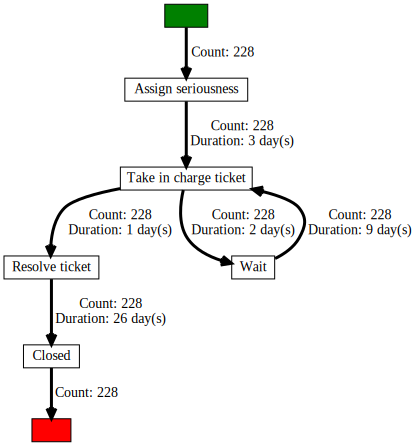

In [15]:
H22 = graphviz.Digraph(format='png')

H22.attr(rankdir='TB')
H22.attr('node', shape='rectangle', width='0', height='0')
H22.attr('edge', arrowhead='vee', arrowtail='inv')

max_node = 3
max_start_act = start_act['Weight'].max()

nodelist22 = []
for idx, row in start_act.iterrows():
    node112, node222, weight222 = [str(i) for i in row]
    
    if node112 not in nodelist22:
        H22.node(node112, style='filled', fillcolor='green', fontcolor='green', shape='rectangle')
#                  str(start_act['Weight'].sum()), fontcolor='black', shape='rectangle')
        nodelist22.append(node222)
    if node222 not in nodelist22:
        H22.node(node222)
#                  str(start_act[start_act['First Activity'] == node222]['Weight'].sum()))
        nodelist22.append(node222)
        
    H22.edge(node112, node222, label = '   Count: '+ weight222, penwidth=str(int(weight222)/max_start_act*max_node))
    
max_case_id = sortnewtimetest['Count'].max()    
nodelist2 = []
for idx, row in sortnewtimetest.iterrows():
    node11, node22, duration, count = [str(i) for i in row]
    
    if node11 not in nodelist2:
        H22.node(node11)
        nodelist2.append(node22)
    if node22 not in nodelist2:
        H22.node(node22)
#                  str(sortnewtimetest[sortnewtimetest['Start Event'] == node22]['Count'].sum()))
        nodelist2.append(node22)
        
    H22.edge(node11, node22, label = '  Count: '+ count + '\n   Duration: ' + duration + ' day(s)', labeljust='l', labeldistance='2.5', labelangle='20', penwidth=str(int(count)/max_case_id*max_node))

max_end_act = end_act['Weight'].max()
nodelist33 = []
for idx, row in end_act.iterrows():
    node113, node223, weight333 = [str(i) for i in row]
    
    if node113 not in nodelist33:
        H22.node(node113)
#                  str(end_act[end_act['Last Activity'] == node113]['Weight'].sum()))
        nodelist33.append(node223)
    if node222 not in nodelist33:
        H22.node(node223, style='filled', fillcolor='red', fontcolor='red', shape='rectangle')
#                  str(end_act['Weight'].sum()), shape='rectangle')
        nodelist33.append(node223)
        
    H22.edge(node113, node223, label = '  Count: '+ weight333, penwidth=str(int(weight333)/max_end_act*max_node))
# H22.render('O2C Test 2nd', view=True)
H22

In [16]:
# Deriving the first and last activities of the cases to get the most frequent occuring start and end activities

df_full = df.copy()
df_full = df_full[['Case ID','Complete Timestamp','Activity']]

activities_list_full = df_full.copy()
activities_list_full['count'] = activities_list_full.groupby('Case ID').cumcount()+1
activities_list_full = activities_list_full.pivot(index='Case ID', columns='count', values='Activity')
# activities_list_full

# Get the last valid index (last activity per case)
def func(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]
    
activities_list_full['Last Activity'] = activities_list_full.apply(func, axis=1)
activities_list_full['First Activity'] = activities_list_full[1]
# activities_list

# Start Activities ccp
start_act_full = activities_list_full.groupby(['First Activity']).size()
start_act_full = start_act_full.to_frame(name='Weight').reset_index()
start_act_full['Start'] = 'Start'
start_act_full = start_act_full[['Start','First Activity','Weight']]
start_act_full = start_act_full.sort_values(by='Weight', ascending=False).reset_index(drop=True)
# start_act

# End Activities ccp
end_act_full = activities_list_full.groupby(['Last Activity']).size()
end_act_full = end_act_full.to_frame(name='Weight').reset_index()
end_act_full['End'] = 'End'
end_act_full = end_act_full[['Last Activity','End','Weight']]
end_act_full = end_act_full.sort_values(by='Weight', ascending=False).reset_index(drop=True)
# end_act

# Timing details
# newxox2_td = newxox2[['lawsuit_id','date','movement']]
sort11_full = df_full.iloc[:-1,:]
sort22_full = df_full.iloc[1:,:].reset_index(drop=True)
sortnew2_full = pd.concat([sort11_full,sort22_full],axis=1)

sortnew2_full.columns = ['Case ID','Start Time','Start Event','Case ID_2','End Time','End Event']
sortnew2_full['Comparison'] = sortnew2_full.apply(lambda x: True if x['Case ID'] == x['Case ID_2'] else False,axis=1)
sortnew2_full = sortnew2_full[sortnew2_full['Comparison'] == True]
# sortnew2

sortnewtime_full = sortnew2_full.copy()
sortnewtime_full['Duration'] = (sortnewtime_full['End Time'] - sortnewtime_full['Start Time']).dt.days

sortnewtime_full = sortnewtime_full[['Start Event','End Event','Duration']]
# sortnewtime_full['Duration'] = sortnewtime_full['Duration'].apply(lambda x: round(x.total_seconds(),0))
sortnewtime_full = sortnewtime_full.groupby(['Start Event','End Event']).agg({'Duration': ['mean'],'Start Event':['count']}).reset_index()
sortnewtime_full.columns = ['Start Event','End Event', 'Duration', 'Count']
sortnewtime_full['Duration'] = round(sortnewtime_full['Duration'],0)
sortnewtime_full['Duration'] = sortnewtime_full['Duration'].astype('int')

sortnewtime_full

,Start Event,End Event,Duration,Count
0,Assign seriousness,Assign seriousness,3,439
1,Assign seriousness,Create SW anomaly,12,4
2,Assign seriousness,Require upgrade,11,8
3,Assign seriousness,Resolve ticket,3,258
4,Assign seriousness,Take in charge ticket,3,4160
5,Assign seriousness,Wait,3,69
6,Closed,Closed,2,14
7,Closed,Take in charge ticket,18,2
8,Closed,VERIFIED,6,1
9,Create SW anomaly,Create SW anomaly,2,4


In [17]:
start_act_full

,Start,First Activity,Weight
0,Start,Assign seriousness,4384
1,Start,Insert ticket,118
2,Start,Take in charge ticket,74
3,Start,Resolve ticket,2
4,Start,Create SW anomaly,1
5,Start,Wait,1


In [18]:
end_act_full

,Last Activity,End,Weight
0,Closed,End,4557
1,Resolve ticket,End,10
2,Wait,End,8
3,Require upgrade,End,3
4,Take in charge ticket,End,1
5,VERIFIED,End,1


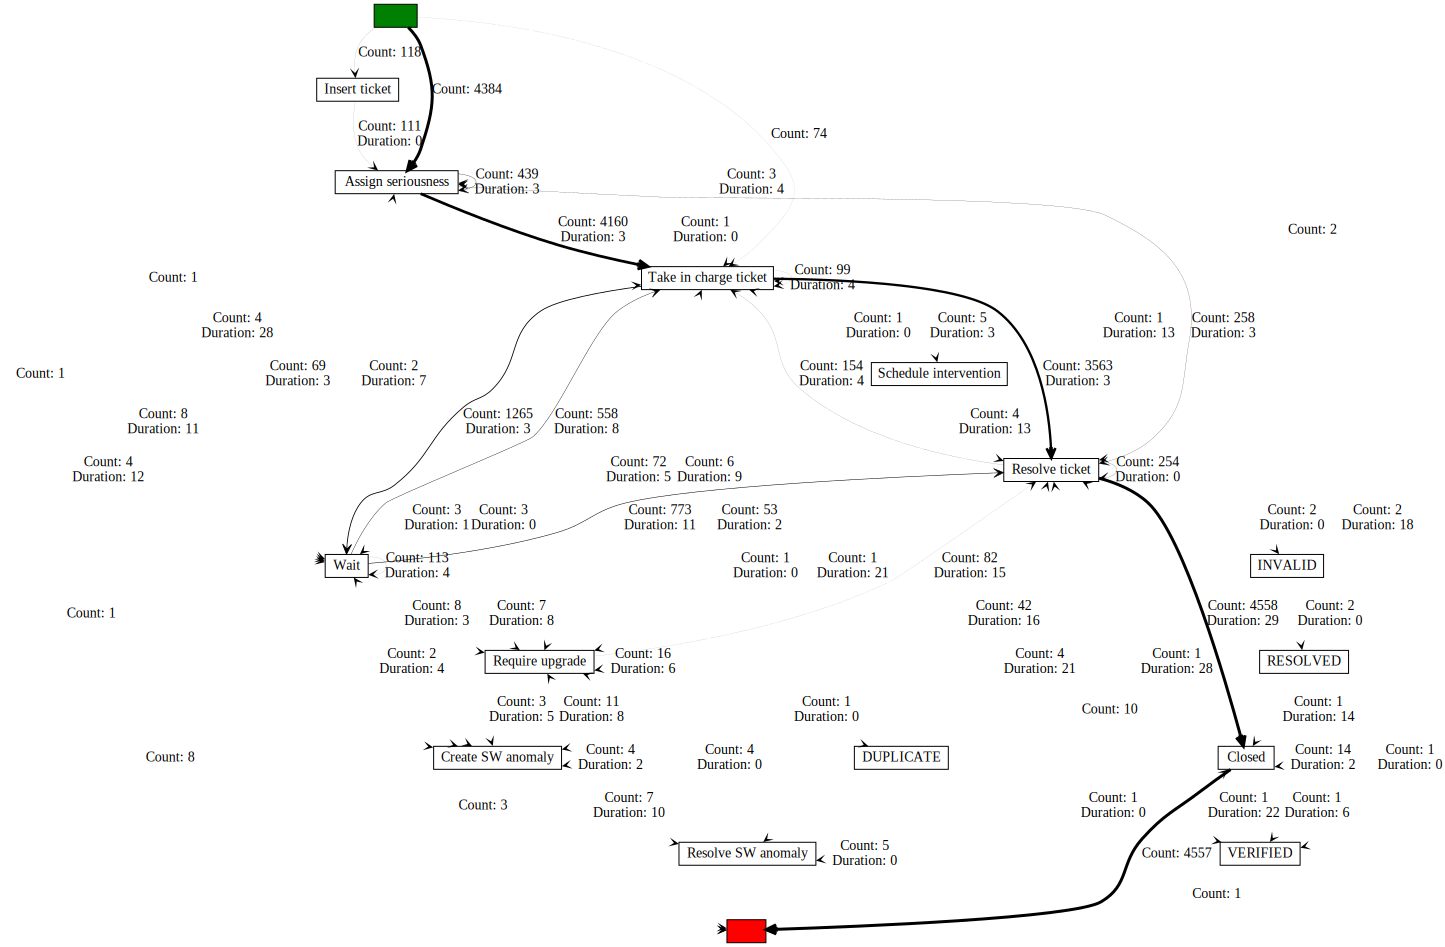

In [19]:
Hfull = graphviz.Digraph(format='png')

Hfull.attr(rankdir='TB')
Hfull.attr('node', shape='rectangle', width='0', height='0')
Hfull.attr('edge', arrowhead='vee', arrowtail='inv')

max_node = 3
max_start_act = start_act_full['Weight'].max()

nodelistfull = []
for idx, row in start_act_full.iterrows():
    node112, node222, weight222 = [str(i) for i in row]
    
    if node112 not in nodelistfull:
        Hfull.node(node112, style='filled', fillcolor='green', fontcolor='green', shape='rectangle')
        nodelistfull.append(node222)
    if node222 not in nodelistfull:
        Hfull.node(node222)
        nodelistfull.append(node222)
        
    Hfull.edge(node112, node222, label = 'Count: '+ weight222, penwidth=str(int(weight222)/max_start_act*max_node))
    
max_case_id = sortnewtime_full['Count'].max()    
nodelistfull_2 = []
for idx, row in sortnewtime_full.iterrows():
    node11, node22, duration, count = [str(i) for i in row]
    
    if node11 not in nodelistfull_2:
        Hfull.node(node11)
        nodelistfull_2.append(node22)
    if node22 not in nodelistfull_2:
        Hfull.node(node22)
        nodelistfull_2.append(node22)
        
    Hfull.edge(node11, node22, label = 'Count: '+ count + '\nDuration: ' + duration, labeljust='l', labeldistance='2.5', labelangle='20', penwidth=str(int(count)/max_case_id*max_node))

max_end_act = end_act_full['Weight'].max()
nodelistfull_3 = []
for idx, row in end_act_full.iterrows():
    node113, node223, weight333 = [str(i) for i in row]
    
    if node113 not in nodelistfull_3:
        Hfull.node(node113)
        nodelistfull_3.append(node223)
    if node222 not in nodelistfull_3:
        Hfull.node(node223, style='filled', fillcolor='red', fontcolor='red', shape='rectangle')
        nodelistfull_3.append(node223)
        
    Hfull.edge(node113, node223, label = 'Count: '+ weight333, penwidth=str(int(weight333)/max_end_act*max_node))
# Hfull.render('Italyy', view=True)
Hfull